# Gini vs GDP per cápita
> Gini vs GDP per cápita.

- toc: true 
- badges: true
- comments: true
- categories: [jupyter]
- image: images/chart-preview.png

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({'xtick.labelsize' : 14,
                     'ytick.labelsize' : 14})

In [2]:
import wbdata
import seaborn as sns
from scipy import stats
from adjustText import adjust_text

In [21]:
indicators = {'SI.POV.GINI':'Gini Index', 
              'NY.GDP.PCAP.PP.KD':'GDP per capita (constant 2010 US$)',
              'SP.POP.TOTL':'Population'}

In [50]:
indicators = {'C0.02':'Country ISO3'}

In [57]:
df1 = wbdata.get_dataframe(indicators=indicators)

In [58]:
df1.reset_index()

country  date Country ISO3
0           Aruba  2019         None
1           Aruba  2018         None
2     Afghanistan  2019         None
3     Afghanistan  2018         None
4          Angola  2019         None
..            ...   ...          ...
437  South Africa  2018         None
438        Zambia  2019         None
439        Zambia  2018         None
440      Zimbabwe  2019         None
441      Zimbabwe  2018         None

[442 rows x 3 columns]

In [49]:
wbdata.search_indicators("ISO")

id                     name
---------------------  ---------------------------------------------------------------------------------------------------------
BI.PWK.CMPA.GE.MD      Cross-country public sector pay comparison ratio, by occupation: Government economist (using median)
BI.PWK.CMPA.GE.SM      Cross-country public sector pay comparison ratio, by occupation: Government economist (using mean)
BI.PWK.CMPA.HD.MD      Cross-country public sector pay comparison ratio, by occupation: Hospital doctor (using median)
BI.PWK.CMPA.HD.SM      Cross-country public sector pay comparison ratio, by occupation: Hospital doctor (using mean)
BI.PWK.CMPA.HN.MD      Cross-country public sector pay comparison ratio, by occupation: Hospital nurse (using median)
BI.PWK.CMPA.HN.SM      Cross-country public sector pay comparison ratio, by occupation: Hospital nurse (using mean)
BI.PWK.CMPA.JU.MD      Cross-country public sector pay comparison ratio, by occupation: Judge (using median)
BI.PWK.CMPA.JU.SM 

In [22]:
data = wbdata.get_dataframe(indicators=indicators)

In [23]:
data.head()

Gini Index  \
country                     date               
Africa Eastern and Southern 2020         NaN   
                            2019         NaN   
                            2018         NaN   
                            2017         NaN   
                            2016         NaN   

                                  GDP per capita (constant 2010 US$)  \
country                     date                                       
Africa Eastern and Southern 2020                         3387.594670   
                            2019                         3568.597017   
                            2018                         3579.271917   
                            2017                         3569.667028   
                            2016                         3546.711250   

                                   Population  
country                     date               
Africa Eastern and Southern 2020  677243299.0  
                            2019  660046272.0  
                            2018  643090131.0  
                            2017  626392880.0  
                            2016  609978946.0

In [24]:
data = data.reset_index()

In [27]:
data[data["country"]=='Argentina'].iloc[0,-1]

45376763.0

In [35]:
df = pd.DataFrame(columns= ['Country','Gini','GDP','Population'], index=None)
for country in data["country"].unique():
    if data[data["country"]==country]['Gini Index'].notna().sum() != 0 and data[data["country"]==country]['GDP per capita (constant 2010 US$)'].notna().sum() != 0:
        gini = [data[data["country"]==country]['Gini Index'].iloc[i] for i in range(len(data[data["country"]==country])) if data[data["country"]==country]['Gini Index'].notna().iloc[i]]
        gdp = [data[data["country"]==country]['GDP per capita (constant 2010 US$)'].iloc[i] for i in range(len(data[data["country"]==country])) if data[data["country"]==country]['GDP per capita (constant 2010 US$)'].notna().iloc[i]]
        pop = data[data["country"]==country].iloc[0,-1]
        df = df.append({'Country':country,
                        'Gini':gini[0],
                        'GDP':gdp[0],
                        'Population':pop}, ignore_index=True)

In [36]:
df.head()

Country  Gini           GDP  Population
0    Albania  33.2  13295.410885   2837743.0
1    Algeria  27.6  10681.679297  43851043.0
2     Angola  51.3   6198.083841  32866268.0
3  Argentina  42.9  19686.523659  45376763.0
4    Armenia  29.9  12592.635368   2963234.0

In [9]:
df = df.set_index("Country")

In [10]:
slope, intercept, r_value, p_value, std_err = stats.linregress(np.log10(df["GDP"]), df["Gini"])
slope, intercept, r_value, p_value, std_err

(-6.161114963024121,
 62.781972383145074,
 -0.37882310730237356,
 6.151978699393198e-07,
 1.186238007740407)

In [11]:
sa = ["Argentina", "Bolivia", "Brazil", "Colombia", "Ecuador", "Paraguay", "Peru", "Uruguay"]

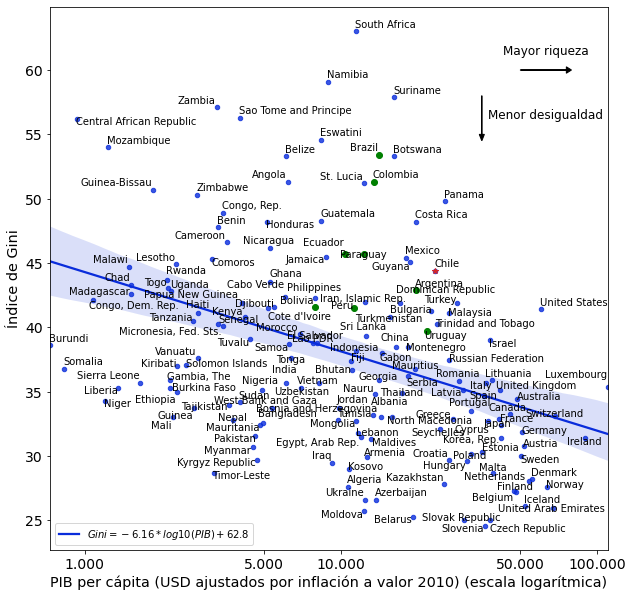

In [12]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.regplot(x=np.log10(df["GDP"]), y=df["Gini"], color = '#092CDB', line_kws={'label':f'$Gini={slope:.2f}*log10(PIB)+{intercept:.1f}$'}, scatter_kws={'s':20});
ax.plot(np.log10(df.loc["Chile","GDP"]),df.loc["Chile","Gini"], marker="*", color="C3")
for c in sa:
    ax.plot(np.log10(df.loc[c,"GDP"]), df.loc[c,"Gini"], marker='o', color="green")
plt.arrow(4.7,60,0.2,0, length_includes_head=True, head_width=0.5, head_length=0.02, color="black")
plt.arrow(4.55,58,0,-3.5, length_includes_head=True, head_width=0.02, head_length=0.5, color="black")
plt.annotate("Mayor riqueza",(4.8,61), va='bottom', ha='center', fontsize=12)
plt.annotate("Menor desigualdad",(4.8,56), va='bottom', ha='center', fontsize=12)
texts = [plt.annotate(txt, (np.log10(df.iloc[i,1]), df.iloc[i,0]), textcoords="offset points", xytext=(-1,2), fontsize="medium") for i, txt in enumerate(df.index)]
adjust_text(texts)
ax.set_xticks([np.log10(10**3), np.log10(5000), np.log10(10**4), np.log10(50000), np.log10(10**5)])
ax.set_xticklabels(["1.000","5.000","10.000","50.000","100.000"])
ax.set_xlabel(f'PIB per cápita (USD ajustados por inflación a valor 2010) (escala logarítmica)', fontsize='x-large')
ax.set_ylabel(f"Índice de Gini", fontsize="x-large")
ax.legend(loc='lower left')
plt.show()

In [37]:
df["GDP"] = np.log10(df["GDP"])

In [44]:
df["Population"] = np.exp(df["Population"])

In [39]:
df = df.reset_index()

In [45]:
# x and y given as DataFrame columns
import plotly.express as px
fig = px.scatter(df, x="GDP", y="Gini", size="Population", hover_data=['Country'])
fig.show()